In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("Full-Sales-Superstore.xlsx", sheet_name="Superstore dataset")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Category           9994 non-null   object        
 1   City               9994 non-null   object        
 2   Country            9994 non-null   object        
 3   Customer Name      9994 non-null   object        
 4   Manufacturer       9994 non-null   object        
 5   Order Date         9994 non-null   datetime64[ns]
 6   Order ID           9994 non-null   object        
 7   Postal Code        9994 non-null   int64         
 8   Product Name       9994 non-null   object        
 9   Region             9994 non-null   object        
 10  Segment            9994 non-null   object        
 11  Ship Date          9994 non-null   datetime64[ns]
 12  Ship Mode          9994 non-null   object        
 13  State              9994 non-null   object        
 14  Sub-Cate

In [4]:
data.isnull().sum()

Category             0
City                 0
Country              0
Customer Name        0
Manufacturer         0
Order Date           0
Order ID             0
Postal Code          0
Product Name         0
Region               0
Segment              0
Ship Date            0
Ship Mode            0
State                0
Sub-Category         0
Discount             0
Number of Records    0
Profit               0
Profit Ratio         0
Quantity             0
Sales                0
dtype: int64

In [5]:
print(data.head())

          Category          City        Country  Customer Name  Manufacturer  \
0  Office Supplies       Houston  United States  Darren Powers  Message Book   
1  Office Supplies    Naperville  United States  Phillina Ober           GBC   
2  Office Supplies    Naperville  United States  Phillina Ober         Avery   
3  Office Supplies    Naperville  United States  Phillina Ober         SAFCO   
4  Office Supplies  Philadelphia  United States     Mick Brown         Avery   

  Order Date        Order ID  Postal Code  \
0 2011-01-04  CA-2011-103800        77095   
1 2011-01-05  CA-2011-112326        60540   
2 2011-01-05  CA-2011-112326        60540   
3 2011-01-05  CA-2011-112326        60540   
4 2011-01-06  CA-2011-141817        19143   

                                        Product Name   Region  ...  Ship Date  \
0  Message Book, Wirebound, Four 5 1/2" X 4" Form...  Central  ... 2011-01-08   
1         GBC Standard Plastic Binding Systems Combs  Central  ... 2011-01-09   
2    

In [6]:
print("Total Sales in USD: ",data["Sales"].sum())
print("Total Profit in USD: ",data["Profit"].sum())
print("Average Profit Ratio: ",data["Profit Ratio"].mean())
print("Average Discount: ",data["Discount"].mean())

Total Sales in USD:  2297354
Total Profit in USD:  286347
Average Profit Ratio:  0.12053231939163461
Average Discount:  0.15620272163299012


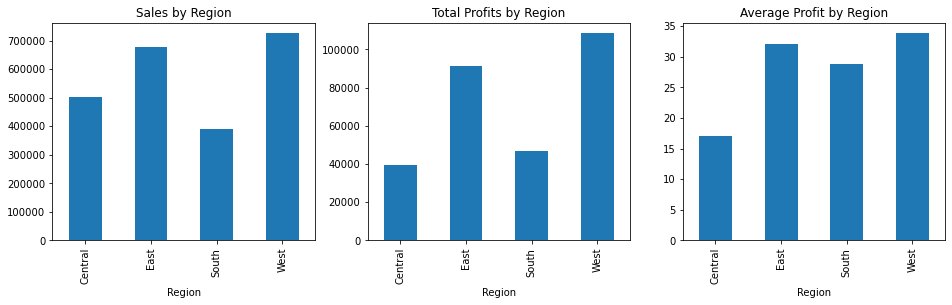

In [7]:
plt.figure(figsize=(16,4))

plt.subplot(1, 3, 1)
data.groupby("Region")["Sales"].sum().plot(kind="bar")
plt.title("Sales by Region")

plt.subplot(1, 3, 2)
data.groupby("Region")["Profit"].sum().plot(kind="bar")
plt.title("Total Profits by Region")

plt.subplot(1, 3, 3)
data.groupby("Region")["Profit"].mean().plot(kind="bar")
plt.title("Average Profit by Region")

plt.show()

In [8]:
data.groupby("Region")["Profit Ratio"].mean()

Region
Central   -0.103995
East       0.167479
South      0.163722
West       0.219785
Name: Profit Ratio, dtype: float64

In [9]:
data.groupby("Region")["Discount"].mean()

Region
Central    0.240353
East       0.145365
South      0.147253
West       0.109335
Name: Discount, dtype: float64

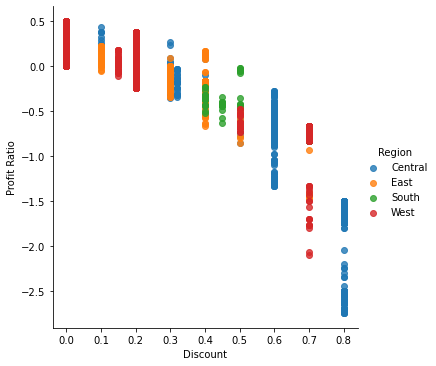

In [10]:
sns.lmplot('Discount', 'Profit Ratio', data=data, hue='Region', fit_reg=False)
plt.show()

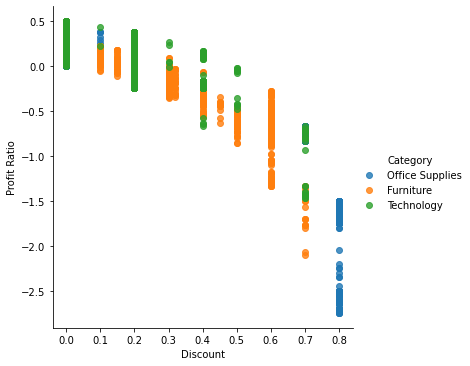

In [11]:
sns.lmplot('Discount', 'Profit Ratio', data=data, hue='Category', fit_reg=False)
plt.show()

In [12]:
region_central = data[data["Region"]=="Central"]

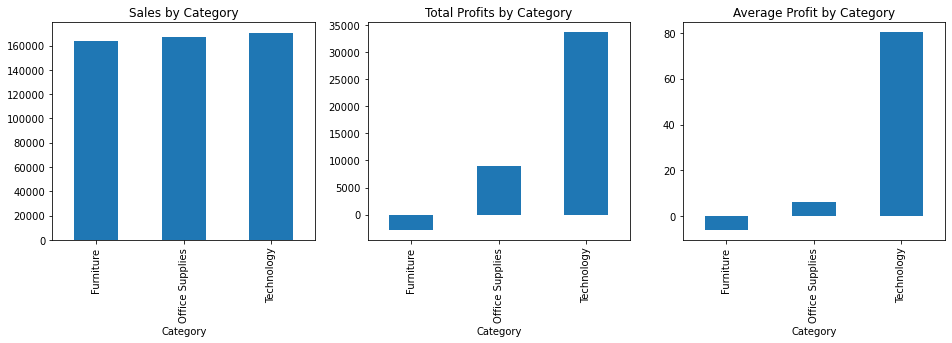

In [13]:
plt.figure(figsize=(16,4))

plt.subplot(1, 3, 1)
region_central.groupby("Category")["Sales"].sum().plot(kind="bar")
plt.title("Sales by Category")

plt.subplot(1, 3, 2)
region_central.groupby("Category")["Profit"].sum().plot(kind="bar")
plt.title("Total Profits by Category")

plt.subplot(1, 3, 3)
region_central.groupby("Category")["Profit"].mean().plot(kind="bar")
plt.title("Average Profit by Category")

plt.show()

In [14]:
region_central.groupby("Category")["Profit Ratio"].mean()

Category
Furniture         -0.186341
Office Supplies   -0.158671
Technology         0.175429
Name: Profit Ratio, dtype: float64

In [15]:
region_central.groupby("Category")["Discount"].mean()

Category
Furniture          0.297380
Office Supplies    0.252743
Technology         0.133095
Name: Discount, dtype: float64

In [16]:
rc_critical_category = region_central[region_central["Category"]!="Technology"]

In [17]:
rc_critical_category.groupby("Sub-Category")["Sales"].sum()

Sub-Category
Appliances     23582
Art             5763
Binders        56927
Bookcases      24153
Chairs         85228
Envelopes       4638
Fasteners        776
Furnishings    15256
Labels          2454
Paper          17491
Storage        45934
Supplies        9470
Tables         39152
Name: Sales, dtype: int64

In [18]:
rc_critical_category.groupby("Sub-Category")["Profit"].sum()

Sub-Category
Appliances    -2642
Art            1208
Binders       -1053
Bookcases     -1998
Chairs         6594
Envelopes      1770
Fasteners       237
Furnishings   -3902
Labels         1076
Paper          6981
Storage        1977
Supplies       -659
Tables        -3561
Name: Profit, dtype: int64

In [19]:
rc_critical_category.groupby("Sub-Category")["Profit"].mean()

Sub-Category
Appliances    -21.479675
Art             6.863636
Binders        -2.877049
Bookcases     -39.960000
Chairs         42.818182
Envelopes      30.000000
Fasteners       4.309091
Furnishings   -19.034146
Labels         14.157895
Paper          21.747664
Storage         9.414286
Supplies      -18.305556
Tables        -49.458333
Name: Profit, dtype: float64

In [20]:
rc_critical_category.groupby("Sub-Category")["Discount"].mean()

Sub-Category
Appliances     0.448780
Art            0.122727
Binders        0.509290
Bookcases      0.232800
Chairs         0.192857
Envelopes      0.128814
Fasteners      0.134545
Furnishings    0.403902
Labels         0.113158
Paper          0.128972
Storage        0.123810
Supplies       0.144444
Tables         0.262500
Name: Discount, dtype: float64

In [21]:
rc_subcat_prof = pd.DataFrame(rc_critical_category.groupby("Sub-Category")["Profit"].mean()).sort_values("Profit").reset_index()
print(rc_subcat_prof)

   Sub-Category     Profit
0        Tables -49.458333
1     Bookcases -39.960000
2    Appliances -21.479675
3   Furnishings -19.034146
4      Supplies -18.305556
5       Binders  -2.877049
6     Fasteners   4.309091
7           Art   6.863636
8       Storage   9.414286
9        Labels  14.157895
10        Paper  21.747664
11    Envelopes  30.000000
12       Chairs  42.818182


In [22]:
rc_subcat_dis = pd.DataFrame(rc_critical_category.groupby("Sub-Category")["Discount"].mean()).sort_values("Discount", ascending=False).reset_index()
print(rc_subcat_dis)

   Sub-Category  Discount
0       Binders  0.509290
1    Appliances  0.448780
2   Furnishings  0.403902
3        Tables  0.262500
4     Bookcases  0.232800
5        Chairs  0.192857
6      Supplies  0.144444
7     Fasteners  0.134545
8         Paper  0.128972
9     Envelopes  0.128814
10      Storage  0.123810
11          Art  0.122727
12       Labels  0.113158


In [24]:
rc_subcat = pd.merge(rc_subcat_prof, rc_subcat_dis, on="Sub-Category")
rc_subcat = rc_subcat.rename({'Sub-Category': 'Sub-Category', 'Profit': 'Profit Mean', 'Discount': 'Discount Mean'}, axis=1)
rc_subcat.sort_values("Profit Mean")

,Sub-Category,Profit Mean,Discount Mean
0,Tables,-49.458333,0.262500
1,Bookcases,-39.960000,0.232800
2,Appliances,-21.479675,0.448780
3,Furnishings,-19.034146,0.403902
4,Supplies,-18.305556,0.144444
5,Binders,-2.877049,0.509290
6,Fasteners,4.309091,0.134545
7,Art,6.863636,0.122727
8,Storage,9.414286,0.123810
9,Labels,14.157895,0.113158


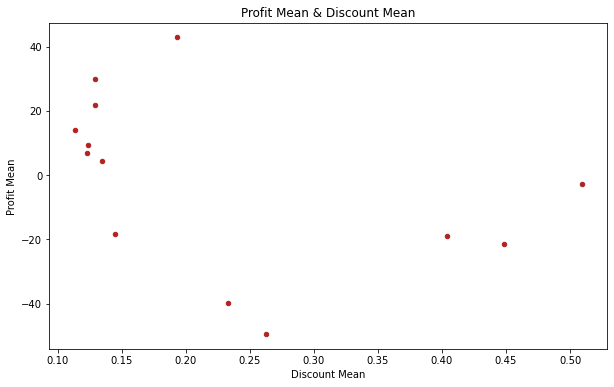

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))

rc_subcat.plot(
    x    = 'Discount Mean',
    y    = 'Profit Mean',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax

)
ax.set_title('Profit Mean & Discount Mean');

In [26]:
rc_subcat["Profit Mean"].corr(rc_subcat["Discount Mean"])

-0.4370785901451076

In [27]:
results = rc_subcat[rc_subcat["Profit Mean"]<0]
print(results)

  Sub-Category  Profit Mean  Discount Mean
0       Tables   -49.458333       0.262500
1    Bookcases   -39.960000       0.232800
2   Appliances   -21.479675       0.448780
3  Furnishings   -19.034146       0.403902
4     Supplies   -18.305556       0.144444
5      Binders    -2.877049       0.509290
